# Produces a Figure Similar to:

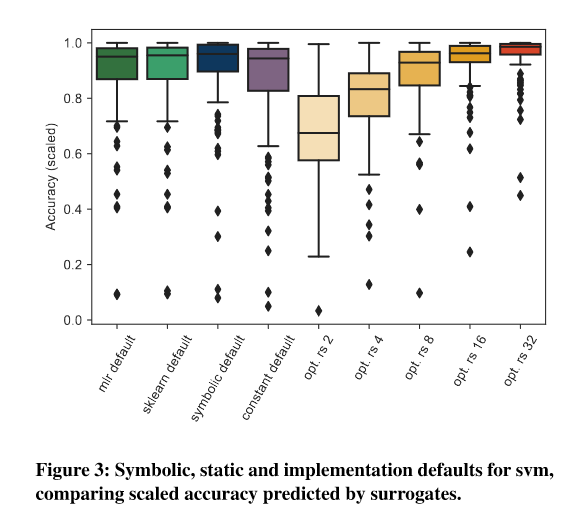

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [ ]:
surrogate_performance = pd.read_csv("surrogate_performance.csv", sep=';', header=0)
surrogate_performance.sample(5)

In [46]:
opt_random_search = pd.read_csv("optimistic_random_search.csv", sep=';', header=0)
opt_random_search

,task,learner,optimizer,constants,expression,surrogate_score
0,9960,xgboost,optimistic_random_search_2,False,100 replications,0.876472
1,9960,xgboost,optimistic_random_search_4,False,100 replications,0.941642
2,9960,xgboost,optimistic_random_search_8,False,100 replications,0.979111
3,9960,xgboost,optimistic_random_search_16,False,100 replications,0.992509
4,9960,xgboost,optimistic_random_search_32,False,100 replications,0.996307
...,...,...,...,...,...,...
3290,168912,svm,optimistic_random_search_2,False,100 replications,0.674328
3291,168912,svm,optimistic_random_search_4,False,100 replications,0.874119
3292,168912,svm,optimistic_random_search_8,False,100 replications,0.939477
3293,168912,svm,optimistic_random_search_16,False,100 replications,0.949916


In [47]:
all_methods = pd.concat([surrogate_performance, opt_random_search])

In the plots we want to make distinctions between different optimizers, but also their constraints (e.g. whether symbolic terminals are used). Additionally we want to simply rename the "programming names" more easily interpretable:

In [52]:
import os
os.mkdir("generated/Figure3/")

In [48]:
def category_from_row(row):
    if '_' in row['optimizer']:
        return row['optimizer'].replace('_', ' ')
    elif row['optimizer'] == "mupluslambda":
        if row['constants']:
            return "constant default"
        else:
            return "symbolic default"
    else:
        raise ValueError(f"Unknown category for {row}")

all_methods["category"] = all_methods.apply(category_from_row, axis=1)

In [74]:
order  = learner_data.category.unique()
colors = ["darkish green", "jade green",  "marine blue" , "dusty purple"  ]
colors = sns.xkcd_palette(colors) + sns.light_palette("orange", 5)[1:] + sns.xkcd_palette(["vermillion"])
color_dict = dict(zip(order, colors))

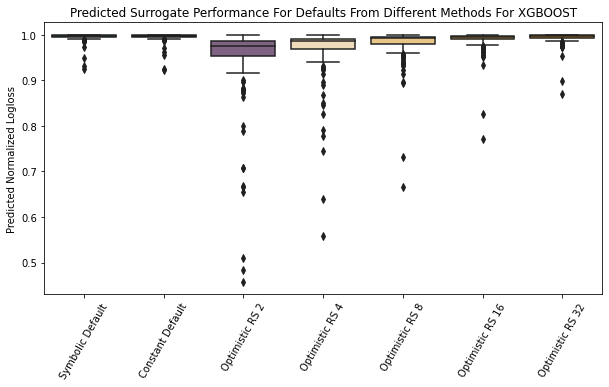

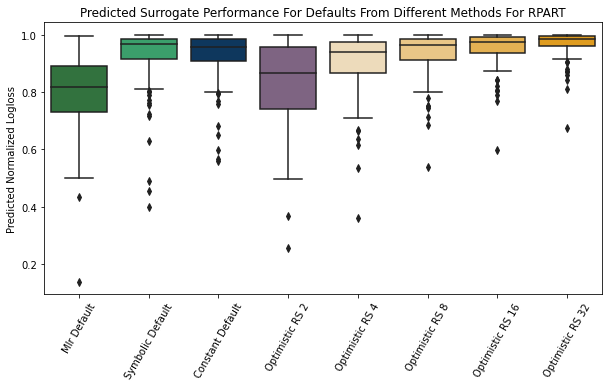

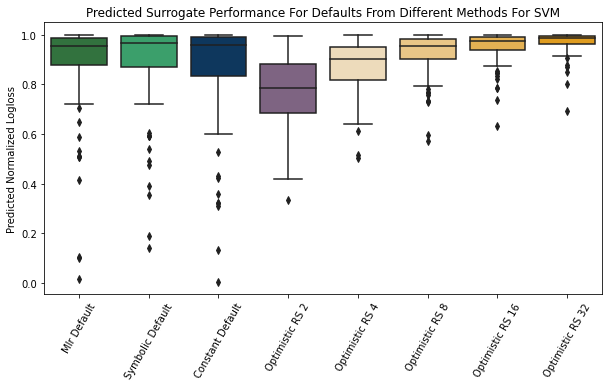

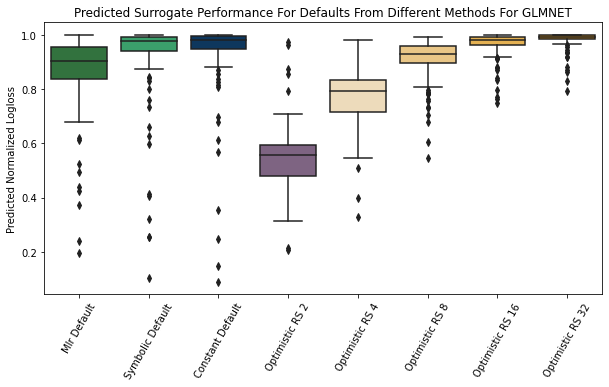

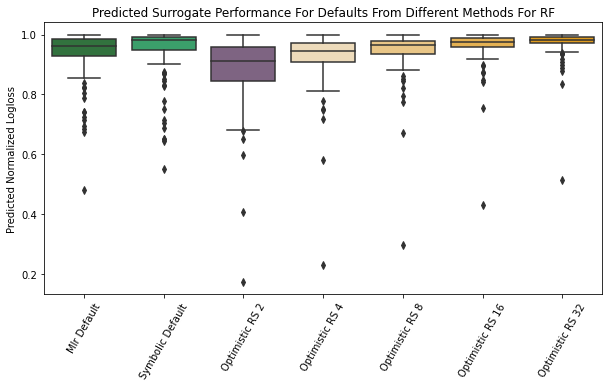

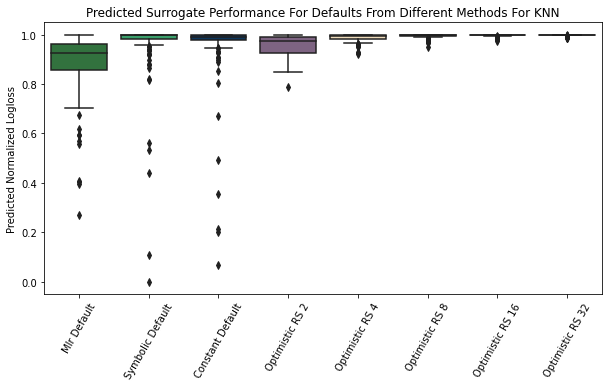

In [78]:
import matplotlib.pyplot as plt

for learner in all_methods.learner.unique():
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
    # learner = "svm"
    learner_data = all_methods[all_methods.learner == learner]
    order_for_learner = [method for method in order if method in learner_data.category.unique()]
    sns.boxplot(
        data=learner_data,
        x="category",
        y="surrogate_score",
        palette=color_dict,
        order=order_for_learner,
        ax=ax
    )

    ax.set_title(f"Predicted Surrogate Performance For Defaults From Different Methods For {learner.upper()}")
    for label in ax.get_xticklabels():
        label.set_text(label.get_text().title().replace("Optimistic Random Search", "Optimistic RS"))
        if learner == "xgboost" and "Sklearn" in label.get_text():
            label.set_text("XGBoost Default")
            
            
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60)
    
    ax.set_xlabel(None)
    ax.set_ylabel("Predicted Normalized Logloss")
    plt.savefig(f"generated/Figure3/{learner}_optimizer_performance.pdf", bbox_inches='tight', pad_inches=.1)
